<a href="https://colab.research.google.com/github/JanieTran/KAGGLE_DisasterTweets/blob/master/disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
% cd "/content/drive/My Drive/Colab/KAGGLE_DisasterTweets"
% pwd

/content/drive/My Drive/Colab/KAGGLE_DisasterTweets


'/content/drive/My Drive/Colab/KAGGLE_DisasterTweets'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = None

In [7]:
train_df = pd.read_csv('train.csv')
train_df.shape

(7613, 5)

In [8]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Target

<BarContainer object of 2 artists>

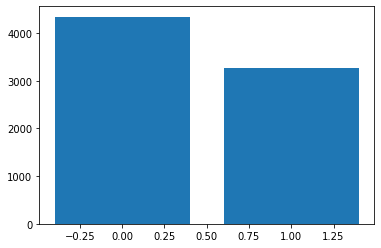

In [9]:
target = train_df['target'].value_counts()
plt.bar(x=target.index, height=target)

# Length

## Characters

In [10]:
train_df['n_char'] = train_df['text'].str.len()
train_df.head()

,id,keyword,location,text,target,n_char
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


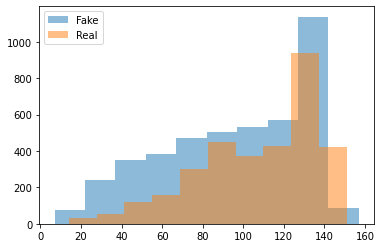

In [11]:
plt.hist(train_df[train_df['target'] == 0]['n_char'], alpha=0.5, label='Fake')
plt.hist(train_df[train_df['target'] == 1]['n_char'], alpha=0.5, label='Real')
plt.legend()
plt.show()

## Words

In [12]:
train_df['n_words'] = train_df['text'].apply(lambda x: len(x.split()))
train_df.head()

,id,keyword,location,text,target,n_char,n_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


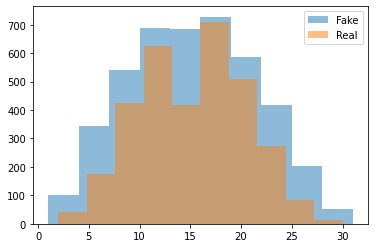

In [13]:
plt.hist(train_df[train_df['target'] == 0]['n_words'], alpha=0.5, label='Fake')
plt.hist(train_df[train_df['target'] == 1]['n_words'], alpha=0.5, label='Real')
plt.legend()
plt.show()

## Average word length

In [14]:
train_df['avg_word_length'] = train_df['n_char'] - train_df['n_words'] + 1
train_df['avg_word_length'] = train_df['avg_word_length'] / train_df['n_words']
train_df.head()

,id,keyword,location,text,target,n_char,n_words,avg_word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.250000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.562500


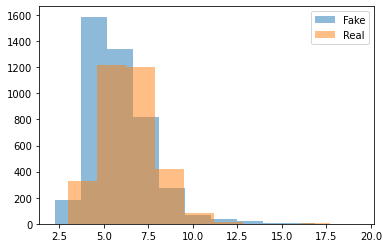

In [15]:
plt.hist(train_df[train_df['target'] == 0]['avg_word_length'], alpha=0.5, label='Fake')
plt.hist(train_df[train_df['target'] == 1]['avg_word_length'], alpha=0.5, label='Real')
plt.legend()
plt.show()

# Special text

## URLs

In [0]:
import re

url_re = re.compile(r'https?://\S+|www\.\S+')

def remove_urls(text):
    chopped_text = url_re.sub(r'', text)
    return ' '.join(chopped_text.split())

In [17]:
train_df['contain_URL'] = train_df['text'].apply(lambda x: 1 if url_re.search(x) else 0)
train_df.head()

,id,keyword,location,text,target,n_char,n_words,avg_word_length,contain_URL
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.250000,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.562500,0


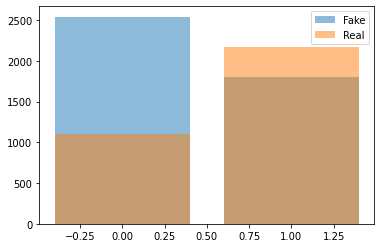

In [18]:
fake_url = train_df[train_df['target'] == 0]['contain_URL'].value_counts()
real_url = train_df[train_df['target'] == 1]['contain_URL'].value_counts()

plt.bar(x=fake_url.index, height=fake_url, alpha=0.5, label='Fake')
plt.bar(x=real_url.index, height=real_url, alpha=0.5, label='Real')
plt.legend()
plt.show()

In [19]:
train_df[train_df['contain_URL'] == 1]['text'].head().tolist()

['@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C',
 'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
 '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi',
 'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N',
 'INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA']

In [0]:
train_df['text'] = train_df['text'].apply(lambda x: remove_urls(x))

In [21]:
train_df[train_df['contain_URL'] == 1]['text'].head().tolist()

['@bbcmtd Wholesale Markets ablaze',
 'We always try to bring the heavy. #metal #RT',
 '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.',
 'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE',
 'INEC Office in Abia Set Ablaze -']

## Hashtag

In [0]:
hashtag_re = re.compile(r'#[A-Za-z0-9]+')

def count_hashtags(text):
    return len(hashtag_re.findall(text))

def avg_hashtag_length(text):
    hashtags = hashtag_re.findall(text)
    if len(hashtags) == 0:
        return 0
    hashtags_len = [len(x) - 1 for x in hashtags]
    return max(hashtags_len)

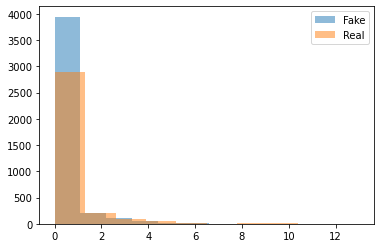

In [23]:
train_df['hashtag_counts'] = train_df['text'].apply(lambda x: count_hashtags(x))

plt.hist(train_df[train_df['target'] == 0]['hashtag_counts'], alpha=0.5, label='Fake')
plt.hist(train_df[train_df['target'] == 1]['hashtag_counts'], alpha=0.5, label='Real')
plt.legend()
plt.show()

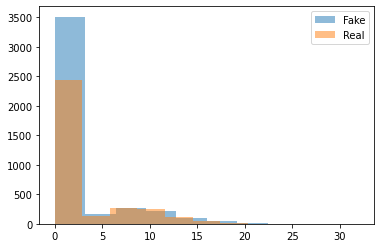

In [24]:
train_df['hashtag_len'] = train_df['text'].apply(lambda x: avg_hashtag_length(x))

plt.hist(train_df[train_df['target'] == 0]['hashtag_len'], alpha=0.5, label='Fake')
plt.hist(train_df[train_df['target'] == 1]['hashtag_len'], alpha=0.5, label='Real')
plt.legend()
plt.show()

# Mentions

In [0]:
mention_re = re.compile(r'@[A-Za-z0-9\_]+')

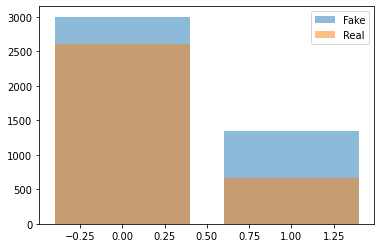

In [26]:
train_df['has_mention'] = train_df['text'].apply(lambda x: 1 if mention_re.search(x) else 0)

fake_mention = train_df[train_df['target'] == 0]['has_mention'].value_counts()
real_mention = train_df[train_df['target'] == 1]['has_mention'].value_counts()

plt.bar(x=fake_mention.index, height=fake_mention, alpha=0.5, label='Fake')
plt.bar(x=real_mention.index, height=real_mention, alpha=0.5, label='Real')
plt.legend()
plt.show()

## Numbers

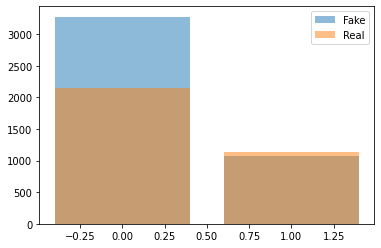

In [27]:
train_df['has_number'] = train_df['text'].apply(lambda x: 1 if re.search(r'\d', x) else 0)

fake_number = train_df[train_df['target'] == 0]['has_number'].value_counts()
real_number = train_df[train_df['target'] == 1]['has_number'].value_counts()

plt.bar(x=fake_number.index, height=fake_number, alpha=0.5, label='Fake')
plt.bar(x=real_number.index, height=real_number, alpha=0.5, label='Real')
plt.legend()
plt.show()

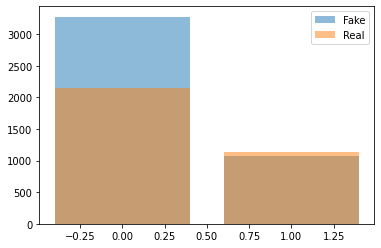

In [28]:
train_df['has_number'] = train_df['text'].apply(lambda x: 1 if re.search(r'\d+', x) else 0)

fake_number = train_df[train_df['target'] == 0]['has_number'].value_counts()
real_number = train_df[train_df['target'] == 1]['has_number'].value_counts()

plt.bar(x=fake_number.index, height=fake_number, alpha=0.5, label='Fake')
plt.bar(x=real_number.index, height=real_number, alpha=0.5, label='Real')
plt.legend()
plt.show()

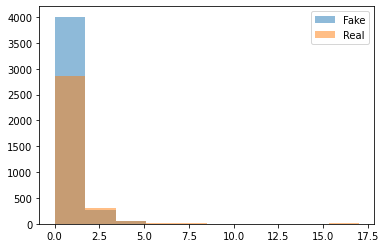

In [29]:
train_df['n_number'] = train_df['text'].apply(lambda x: len(re.findall(r'\d+', x)))

plt.hist(train_df[train_df['target'] == 0]['n_number'], alpha=0.5, label='Fake')
plt.hist(train_df[train_df['target'] == 1]['n_number'], alpha=0.5, label='Real')
plt.legend()
plt.show()

# Text cleaning

## Remove punctuations

In [0]:
import string

def remove_punc(text):
    clean_text = [x if x not in string.punctuation else ' ' for x in text]
    clean_text = ''.join(clean_text)
    return ' '.join(clean_text.split())

In [31]:
train_df['text'].head().tolist()

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school']

In [0]:
train_df['text'] = train_df['text'].apply(lambda x: remove_punc(x))

In [33]:
train_df['text'].head().tolist()

['Our Deeds are the Reason of this earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask Canada',
 'All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected',
 '13 000 people receive wildfires evacuation orders in California',
 'Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school']

## Lowercase

In [0]:
train_df['text'] = train_df['text'].apply(lambda x: x.lower())

In [35]:
train_df['text'].head().tolist()

['our deeds are the reason of this earthquake may allah forgive us all',
 'forest fire near la ronge sask canada',
 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
 '13 000 people receive wildfires evacuation orders in california',
 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school']

In [36]:
train_df.shape

(7613, 14)

In [0]:
def preprocess(text):
  prep_text = remove_urls(text)
  prep_text = remove_punc(prep_text)
  return prep_text.lower()

# Embedding

In [37]:
import gc
gc.collect()

31710

In [38]:
! pip install tensorflow==2

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.

In [39]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)

universal_sentence_encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2.0.0


In [0]:
tweet_texts = train_df['text'].tolist()
tweet_labels = train_df['target'].tolist()

In [41]:
tweet_texts[:2]

['our deeds are the reason of this earthquake may allah forgive us all',
 'forest fire near la ronge sask canada']

In [42]:
tweet_labels[:2]

[1, 1]

In [43]:
gc.collect()

193

In [44]:
tweet_embeddings = []

for count, tweet in enumerate(tweet_texts):
    if count % 500 == 0:
        print(count, end=' ')
    embedding = universal_sentence_encoder([tweet])
    tweet_embeddings.append(np.array(embedding[0]))
    gc.collect()

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 

In [45]:
np_tweet_embeddings = np.array(tweet_embeddings)
np_tweet_embeddings.shape

(7613, 512)

In [46]:
# np.save('np_tweet_embeddings.npy', np_tweet_embeddings)

np_tweet_embeddings = np.load('np_tweet_embeddings.npy')
np_tweet_embeddings.shape

(7613, 512)

In [0]:
X = np_tweet_embeddings.reshape(np_tweet_embeddings.shape[0], np_tweet_embeddings.shape[1], 1)

# Model

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(np.array(tweet_texts), 
                                                  np.array(tweet_labels).reshape(-1, 1),
                                                  test_size=0.15, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(6471,)
(6471, 1)
(1142,)
(1142, 1)


In [0]:
embedding_size = 512
batch_size = 32
n_epochs = 10

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Reshape, Flatten
from tensorflow.keras.layers import Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

model = Sequential([
    hub_layer,
    Reshape(target_shape=(20, 1)),
    Conv1D(filters=256, kernel_size=(2), activation='relu'),
    Conv1D(filters=256, kernel_size=(3), activation='relu'),
    GlobalAveragePooling1D(),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_29 (KerasLayer)  (None, 20)                400020    
_________________________________________________________________
reshape_6 (Reshape)          (None, 20, 1)             0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 19, 256)           768       
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 17, 256)           196864    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)             

In [139]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs,
          validation_data=(X_val, Y_val))

Train on 6471 samples, validate on 1142 samples
Epoch 1/10
6471/6471 [==============================] - 9s 1ms/sample - loss: 0.6050 - accuracy: 0.6840 - val_loss: 0.5791 - val_accuracy: 0.7119
Epoch 2/10
6471/6471 [==============================] - 8s 1ms/sample - loss: 0.5143 - accuracy: 0.7577 - val_loss: 0.4982 - val_accuracy: 0.7644
Epoch 3/10
6471/6471 [==============================] - 8s 1ms/sample - loss: 0.4606 - accuracy: 0.7914 - val_loss: 0.4786 - val_accuracy: 0.7846
Epoch 4/10
6471/6471 [==============================] - 8s 1ms/sample - loss: 0.4189 - accuracy: 0.8156 - val_loss: 0.4695 - val_accuracy: 0.7820
Epoch 5/10
6471/6471 [==============================] - 8s 1ms/sample - loss: 0.3812 - accuracy: 0.8331 - val_loss: 0.4680 - val_accuracy: 0.7872
Epoch 6/10
6471/6471 [==============================] - 8s 1ms/sample - loss: 0.3462 - accuracy: 0.8546 - val_loss: 0.4864 - val_accuracy: 0.7916
Epoch 7/10
6471/6471 [==============================] - 8s 1ms/sample - loss

# Test

In [140]:
test_df = pd.read_csv('test.csv')
test_df.shape

(3263, 4)

In [141]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [142]:
test_df['text'] = test_df['text'].apply(lambda x: preprocess(x))
test_df['text'].head()

0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4        typhoon soudelor kills 28 in china and taiwan
Name: text, dtype: object

In [143]:
X_test = np.array(test_df['text'])
X_test.shape

(3263,)

In [0]:
Y_test_pred = model.predict(X_test)

In [145]:
submission = pd.read_csv('sample_submission.csv')
submission.columns

Index(['id', 'target'], dtype='object')

In [0]:
submission['target'] = (Y_test_pred > 0.5).astype(int).reshape(3263)

In [0]:
submission.to_csv('submission.csv', index=False)